<a href="https://colab.research.google.com/github/maestradelaluz/minerva/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================================
# ANÁLISIS DESCRIPTIVO Y REGRESIÓN LINEAL: DATASET MTCARS
# Estructura: Descriptivo → Gráficos → Correlaciones → Modelos → Supuestos
# ============================================================================

# PASO 1: IMPORTAR LIBRERÍAS NECESARIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


In [ ]:

# ============================================================================
# SECCIÓN 1: ANÁLISIS DESCRIPTIVO DE LOS DATOS
# ============================================================================

print("="*80)
print("SECCIÓN 1: ANÁLISIS DESCRIPTIVO")
print("="*80)

# Cargar dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv'
car_data = pd.read_csv(url)

# 1.1 Primeros registros
print("\n1.1 PRIMEROS 6 REGISTROS DEL DATASET:")
print(car_data.head(6))

# 1.2 Tipo de variables
print("\n1.2 TIPOS DE VARIABLES Y ESTRUCTURA:")
print(car_data.info())

# 1.3 Identificación de tipos de variables
print("\n1.3 CLASIFICACIÓN DE VARIABLES:")
numeric_vars = car_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = car_data.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas ({len(numeric_vars)}): {numeric_vars}")
print(f"Variables categóricas ({len(categorical_vars)}): {categorical_vars}")

# 1.4 Valores faltantes (nulos)
print("\n1.4 VERIFICACIÓN DE VALORES NULOS:")
missing_values = car_data.isnull().sum()
print(missing_values)
print(f"Total de valores faltantes en el dataset: {car_data.isnull().sum().sum()}")

# 1.5 Dimensiones del dataset
print(f"\n1.5 DIMENSIONES DEL DATASET:")
print(f"Número de observaciones: {car_data.shape[0]}")
print(f"Número de variables: {car_data.shape[1]}")

# 1.6 Estadísticas descriptivas de variables numéricas
print("\n1.6 ESTADÍSTICAS DESCRIPTIVAS:")
print(car_data[numeric_vars].describe())

# 1.7 Matriz de correlaciones (solo variables numéricas)
print("\n1.7 MATRIZ DE CORRELACIONES:")
correlation_matrix = car_data[numeric_vars].corr()
print(correlation_matrix)


SECCIÓN 1: ANÁLISIS DESCRIPTIVO

1.1 PRIMEROS 6 REGISTROS DEL DATASET:
        mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb  fast  \
0  4.582576    6  160.0  110  3.90  2.620  16.46   0   1     4     4     1   
1  4.582576    6  160.0  110  3.90  2.875  17.02   0   1     4     4     1   
2  4.774935    4  108.0   93  3.85  2.320  18.61   1   1     4     1     1   
3  4.626013    6  258.0  110  3.08  3.215  19.44   1   0     3     1     1   
4  4.324350    8  360.0  175  3.15  3.440  17.02   0   0     3     2     1   
5  4.254409    6  225.0  105  2.76  3.460  20.22   1   0     3     1     1   

                cars            carname  
0          Mazda RX4          Mazda RX4  
1      Mazda RX4 Wag      Mazda RX4 Wag  
2         Datsun 710         Datsun 710  
3     Hornet 4 Drive     Hornet 4 Drive  
4  Hornet Sportabout  Hornet Sportabout  
5            Valiant            Valiant  

1.2 TIPOS DE VARIABLES Y ESTRUCTURA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [ ]:

# ============================================================================
# SECCIÓN 2: SELECCIÓN Y PREPARACIÓN DEL DATASET
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 2: PREPARACIÓN DEL DATASET PARA ANÁLISIS")
print("="*80)

# Seleccionar variables de interés
CAR_KDD = car_data[['mpg', 'hp', 'wt', 'am']].copy()
print("\nDataset reducido CAR_KDD:")
print(CAR_KDD.head(10))
print(f"\nDimensiones: {CAR_KDD.shape}")


SECCIÓN 2: PREPARACIÓN DEL DATASET PARA ANÁLISIS

Dataset reducido CAR_KDD:
        mpg   hp     wt  am
0  4.582576  110  2.620   1
1  4.582576  110  2.875   1
2  4.774935   93  2.320   1
3  4.626013  110  3.215   0
4  4.324350  175  3.440   0
5  4.254409  105  3.460   0
6  3.781534  245  3.570   0
7  4.939636   62  3.190   0
8  4.774935   95  3.150   0
9  4.381780  123  3.440   0

Dimensiones: (32, 4)



SECCIÓN 3: VISUALIZACIÓN DE VARIABLES


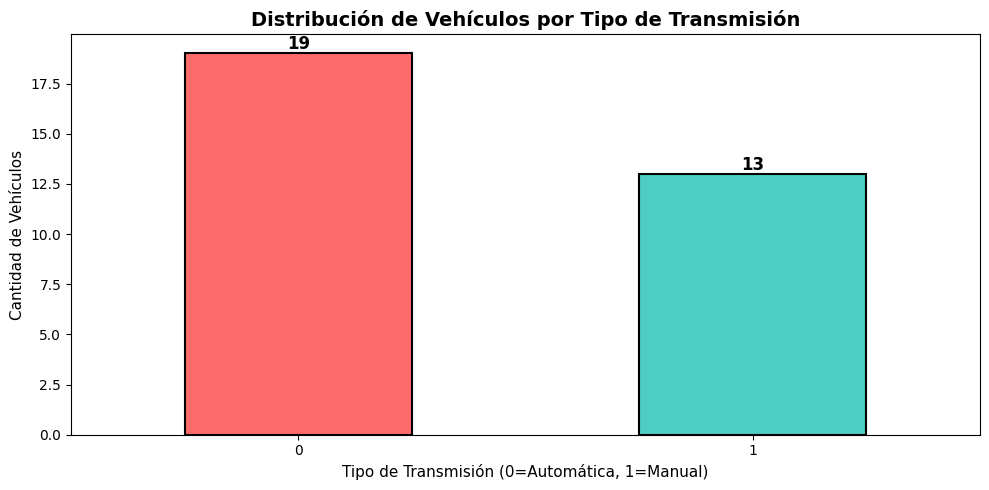

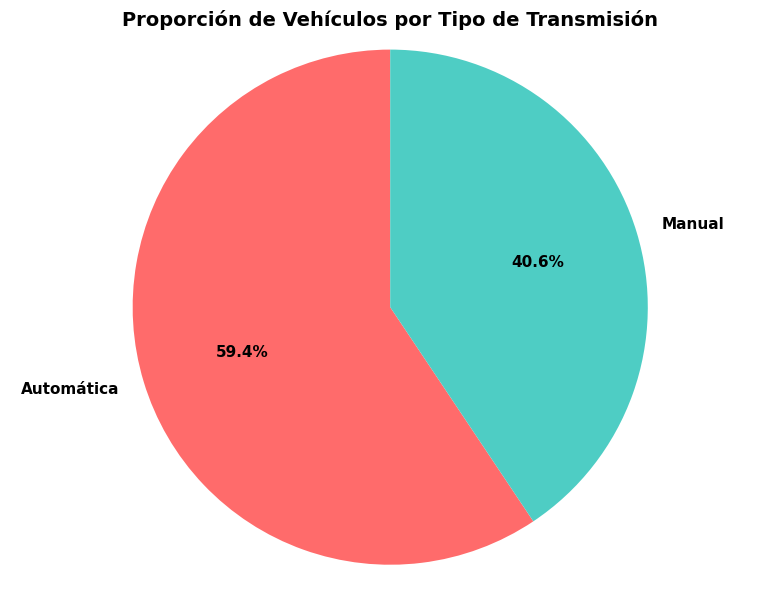

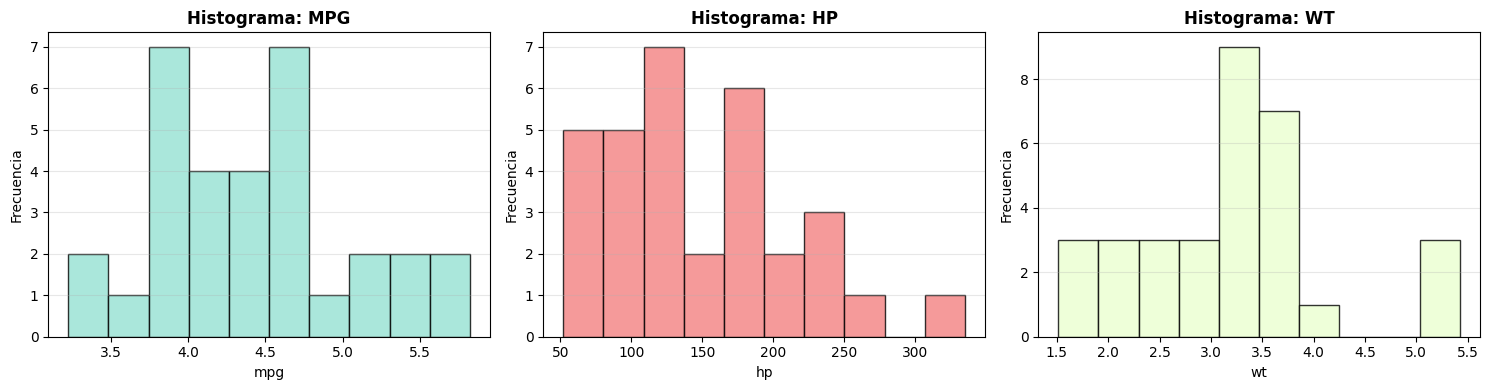

In [ ]:


# ============================================================================
# SECCIÓN 3: VISUALIZACIÓN DE VARIABLES
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 3: VISUALIZACIÓN DE VARIABLES")
print("="*80)

# 3.1 Gráfico de barras para transmisión (variable categórica)
plt.figure(figsize=(10, 5))
trans_count = CAR_KDD['am'].value_counts()
ax = trans_count.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=1.5)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, fontweight='bold')
plt.title('Distribución de Vehículos por Tipo de Transmisión', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Transmisión (0=Automática, 1=Manual)', fontsize=11)
plt.ylabel('Cantidad de Vehículos', fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3.2 Diagrama circular
plt.figure(figsize=(8, 6))
trans_labels = ['Automática', 'Manual']
colors = ['#FF6B6B', '#4ECDC4']
plt.pie(trans_count, labels=trans_labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Proporción de Vehículos por Tipo de Transmisión', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3.3 Histogramas para variables numéricas continuas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
variables_cont = ['mpg', 'hp', 'wt']
colors_hist = ['#95E1D3', '#F38181', '#EAFFD0']

for idx, var in enumerate(variables_cont):
    axes[idx].hist(CAR_KDD[var], color=colors_hist[idx], edgecolor='black',
                   bins=10, alpha=0.8)
    axes[idx].set_title(f'Histograma: {var.upper()}', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


SECCIÓN 4: ANÁLISIS DE CORRELACIONES

Matriz de Correlaciones:
          mpg        hp        wt        am
mpg  1.000000 -0.787309 -0.883453  0.593153
hp  -0.787309  1.000000  0.658748 -0.243204
wt  -0.883453  0.658748  1.000000 -0.692495
am   0.593153 -0.243204 -0.692495  1.000000

Correlación de variables explicativas con mpg (variable dependiente):
am    0.593153
hp   -0.787309
wt   -0.883453
Name: mpg, dtype: float64


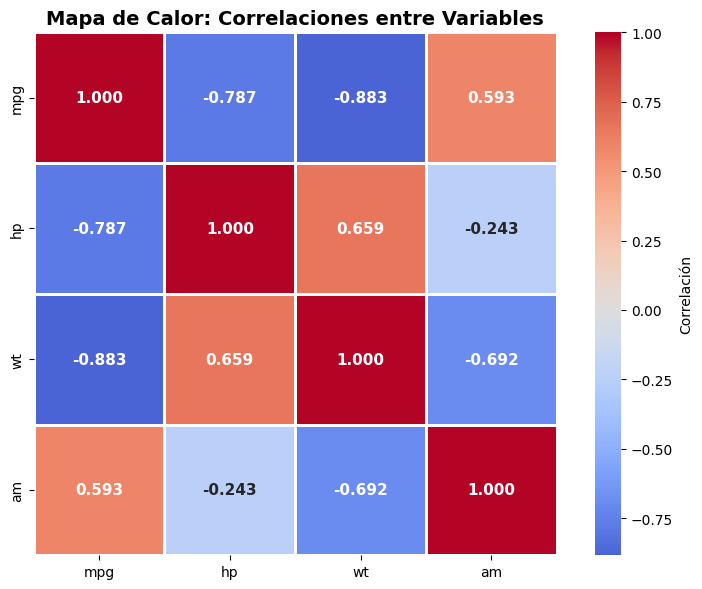

In [ ]:
# ============================================================================
# SECCIÓN 4: MATRIZ DE CORRELACIONES Y HEATMAP
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 4: ANÁLISIS DE CORRELACIONES")
print("="*80)

# Calcular matriz de correlaciones
corr_matrix = CAR_KDD[['mpg', 'hp', 'wt', 'am']].corr()
print("\nMatriz de Correlaciones:")
print(corr_matrix)

# Identificar variables que más influyen en mpg
print("\nCorrelación de variables explicativas con mpg (variable dependiente):")
correlations_with_mpg = corr_matrix['mpg'].drop('mpg').sort_values(ascending=False)
print(correlations_with_mpg)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={'label': 'Correlación'},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Mapa de Calor: Correlaciones entre Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


SECCIÓN 5: REGRESIONES LINEALES SIMPLES

REGRESIÓN SIMPLE: mpg ~ hp

MÉTRICAS DEL MODELO:
  Coeficiente:     -0.007592
  Intercepto:      5.548399
  R²:              0.619855
  RMSE:            0.401210
  AIC:             -54.449324
  Ecuación: mpg = 5.5484 + -0.0076*hp

VERIFICACIÓN DE SUPUESTOS:

  1. NORMALIDAD (Shapiro-Wilk Test):
     Estadístico: 0.960586
     p-valor:     0.284987
     Resultado:   ✓ Residuos normales (p > 0.05)

  2. HOMOCEDASTICIDAD (Breusch-Pagan):
     Estadístico: 0.512841
     p-valor:     0.473912
     Resultado:   ✓ Varianza constante (p > 0.05)

  3. INDEPENDENCIA (Durbin-Watson):
     Estadístico: 1.074719
     Rango ideal: [1.5, 2.5]
     Resultado:   ⚠ Posible autocorrelación

  4. LINEALIDAD:
     R² del modelo: 0.619855
     Resultado:   ✓ Relación lineal adecuada


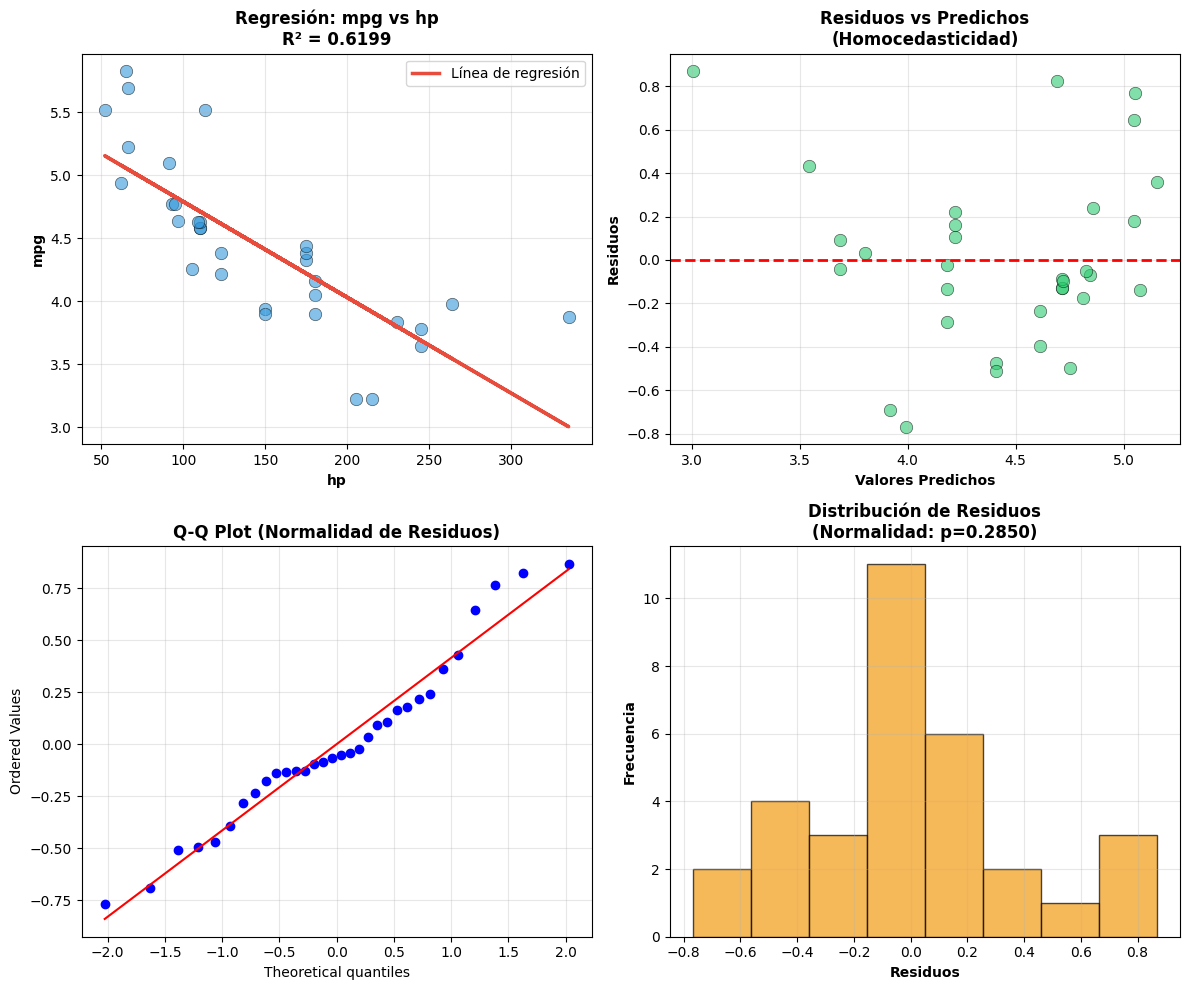


REGRESIÓN SIMPLE: mpg ~ wt

MÉTRICAS DEL MODELO:
  Coeficiente:     -0.596943
  Intercepto:      6.355284
  R²:              0.780488
  RMSE:            0.304878
  AIC:             -72.022004
  Ecuación: mpg = 6.3553 + -0.5969*wt

VERIFICACIÓN DE SUPUESTOS:

  1. NORMALIDAD (Shapiro-Wilk Test):
     Estadístico: 0.952213
     p-valor:     0.166524
     Resultado:   ✓ Residuos normales (p > 0.05)

  2. HOMOCEDASTICIDAD (Breusch-Pagan):
     Estadístico: 0.126605
     p-valor:     0.721979
     Resultado:   ✓ Varianza constante (p > 0.05)

  3. INDEPENDENCIA (Durbin-Watson):
     Estadístico: 1.362677
     Rango ideal: [1.5, 2.5]
     Resultado:   ⚠ Posible autocorrelación

  4. LINEALIDAD:
     R² del modelo: 0.780488
     Resultado:   ✓ Relación lineal adecuada


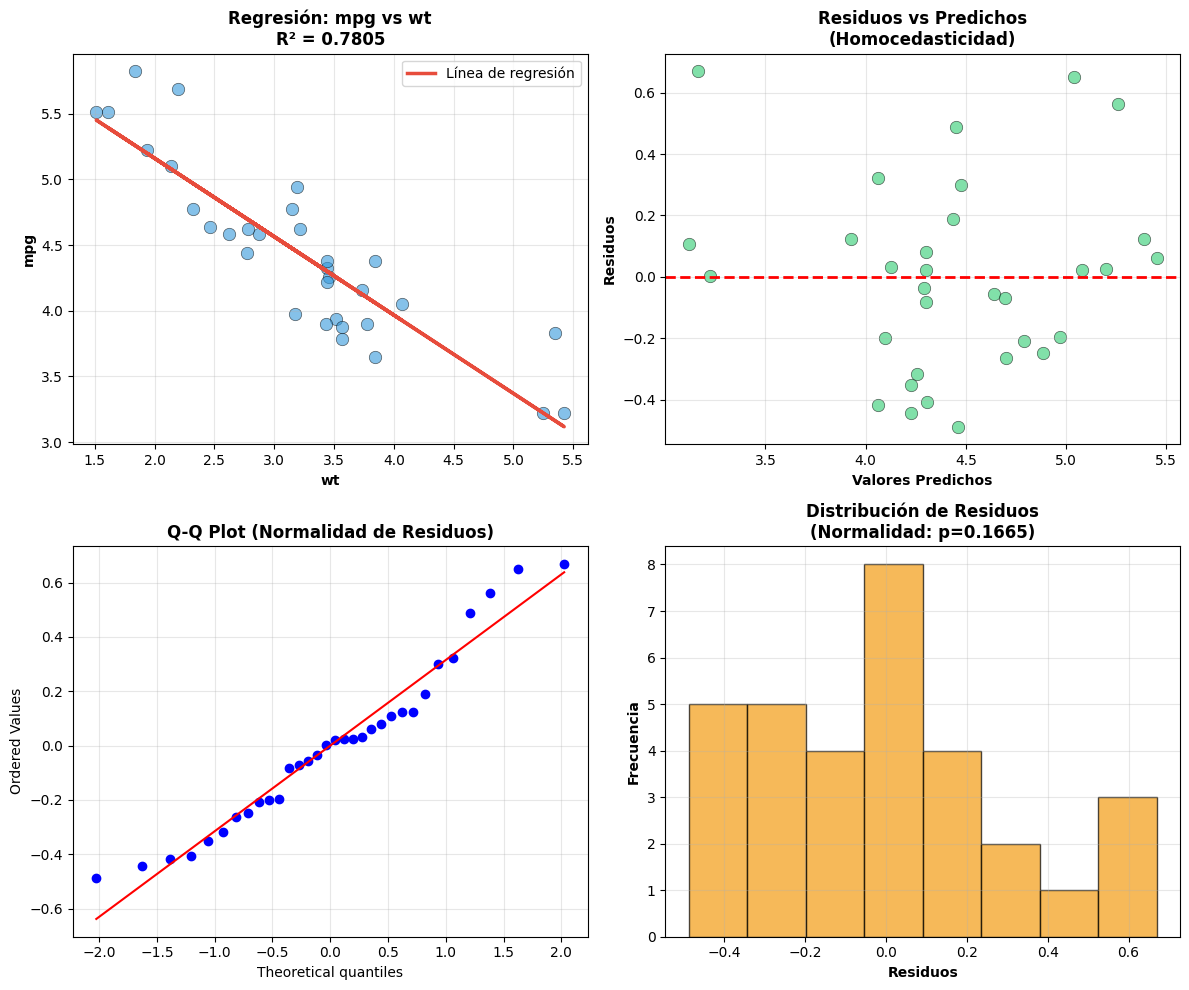


REGRESIÓN SIMPLE: mpg ~ am

MÉTRICAS DEL MODELO:
  Coeficiente:     0.785896
  Intercepto:      4.115499
  R²:              0.351830
  RMSE:            0.523892
  AIC:             -37.374072
  Ecuación: mpg = 4.1155 + 0.7859*am

VERIFICACIÓN DE SUPUESTOS:

  1. NORMALIDAD (Shapiro-Wilk Test):
     Estadístico: 0.965878
     p-valor:     0.394049
     Resultado:   ✓ Residuos normales (p > 0.05)

  2. HOMOCEDASTICIDAD (Breusch-Pagan):
     Estadístico: 2.348194
     p-valor:     0.125428
     Resultado:   ✓ Varianza constante (p > 0.05)

  3. INDEPENDENCIA (Durbin-Watson):
     Estadístico: 1.074450
     Rango ideal: [1.5, 2.5]
     Resultado:   ⚠ Posible autocorrelación

  4. LINEALIDAD:
     R² del modelo: 0.351830
     Resultado:   ✓ Relación lineal adecuada


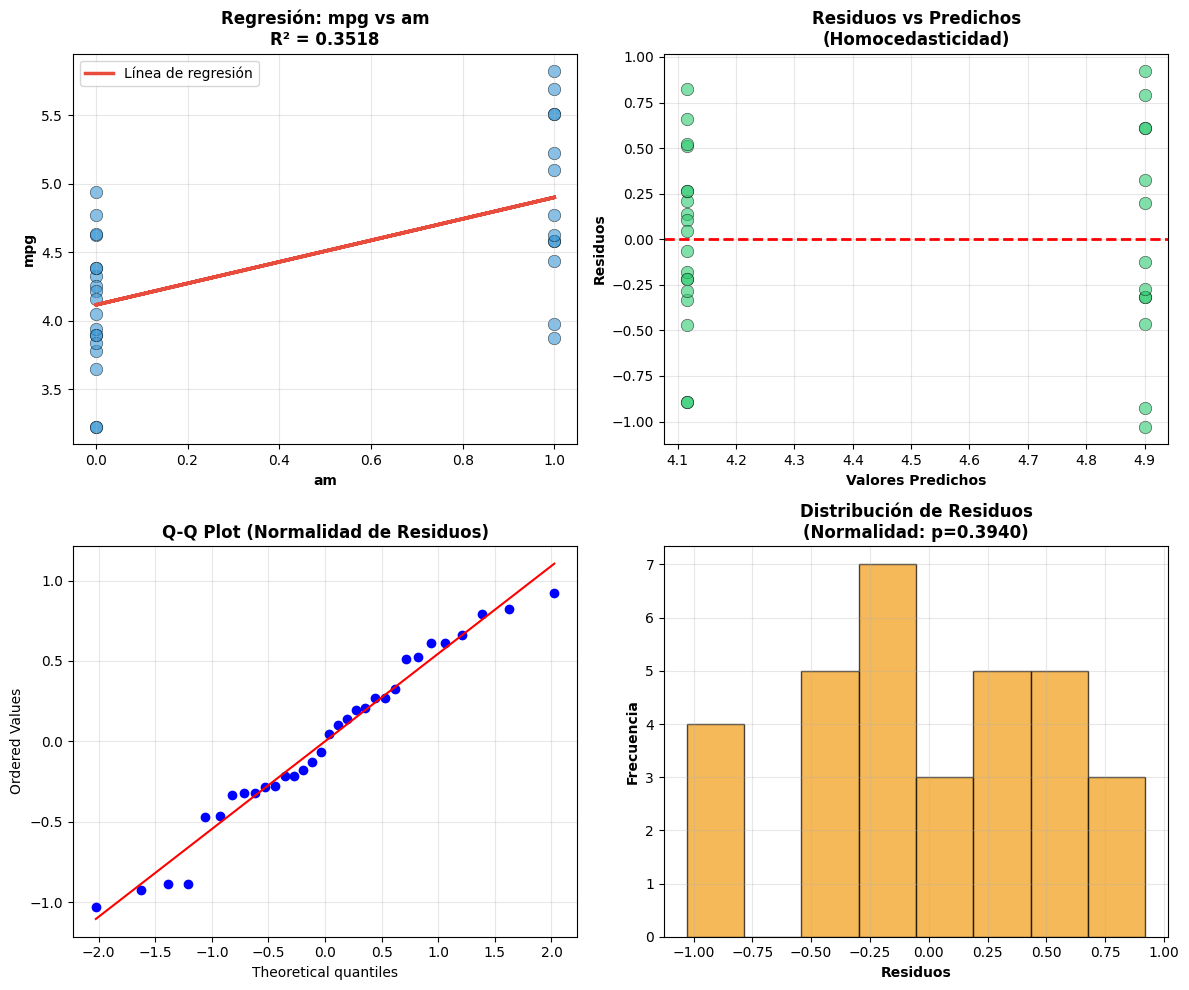

In [ ]:
# ============================================================================
# SECCIÓN 5: REGRESIONES LINEALES SIMPLES CON VERIFICACIÓN DE SUPUESTOS
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 5: REGRESIONES LINEALES SIMPLES")
print("="*80)

# Variables independientes a probar
variables_indep = ['hp', 'wt', 'am']
y = CAR_KDD['mpg']

# Almacenar resultados para comparación posterior
modelos_simples = {}
supuestos_simples = {}

for var in variables_indep:
    print(f"\n{'='*70}")
    print(f"REGRESIÓN SIMPLE: mpg ~ {var}")
    print(f"{'='*70}")

    X_simple = CAR_KDD[[var]]
    modelo = LinearRegression()
    modelo.fit(X_simple, y)
    pred = modelo.predict(X_simple)
    residuos = y - pred

    # Guardar modelo
    modelos_simples[var] = modelo

    # Métricas básicas
    r2 = modelo.score(X_simple, y)
    rmse = np.sqrt(np.mean(residuos**2))
    aic = len(y) * np.log(np.sum(residuos**2)/len(y)) + 2*2

    print(f"\nMÉTRICAS DEL MODELO:")
    print(f"  Coeficiente:     {modelo.coef_[0]:.6f}")
    print(f"  Intercepto:      {modelo.intercept_:.6f}")
    print(f"  R²:              {r2:.6f}")
    print(f"  RMSE:            {rmse:.6f}")
    print(f"  AIC:             {aic:.6f}")
    print(f"  Ecuación: mpg = {modelo.intercept_:.4f} + {modelo.coef_[0]:.4f}*{var}")

    # ---- VERIFICACIÓN DE SUPUESTOS ----
    print(f"\nVERIFICACIÓN DE SUPUESTOS:")

    # Supuesto 1: Normalidad de residuos
    statistic_norm, p_value_norm = stats.shapiro(residuos)
    print(f"\n  1. NORMALIDAD (Shapiro-Wilk Test):")
    print(f"     Estadístico: {statistic_norm:.6f}")
    print(f"     p-valor:     {p_value_norm:.6f}")
    print(f"     Resultado:   {'✓ Residuos normales (p > 0.05)' if p_value_norm > 0.05 else '✗ Residuos NO normales (p < 0.05)'}")

    # Supuesto 2: Homocedasticidad (Breusch-Pagan)
    residuos_abs_std = np.abs(residuos) / np.std(residuos)
    x_aux = X_simple.values
    aux_model = LinearRegression()
    aux_model.fit(x_aux, residuos_abs_std)
    pred_aux = aux_model.predict(x_aux)
    ss_res_aux = np.sum((residuos_abs_std - pred_aux)**2)
    ss_tot_aux = np.sum((residuos_abs_std - np.mean(residuos_abs_std))**2)
    lr_stat = len(y) * (1 - ss_res_aux/ss_tot_aux)
    p_value_hetero = 1 - stats.chi2.cdf(lr_stat, 1)

    print(f"\n  2. HOMOCEDASTICIDAD (Breusch-Pagan):")
    print(f"     Estadístico: {lr_stat:.6f}")
    print(f"     p-valor:     {p_value_hetero:.6f}")
    print(f"     Resultado:   {'✓ Varianza constante (p > 0.05)' if p_value_hetero > 0.05 else '✗ Varianza NO constante (p < 0.05)'}")

    # Supuesto 3: Independencia (Durbin-Watson)
    dw = np.sum(np.diff(residuos)**2) / np.sum(residuos**2)
    print(f"\n  3. INDEPENDENCIA (Durbin-Watson):")
    print(f"     Estadístico: {dw:.6f}")
    print(f"     Rango ideal: [1.5, 2.5]")
    print(f"     Resultado:   {'✓ Residuos independientes' if 1.5 <= dw <= 2.5 else '⚠ Posible autocorrelación'}")

    # Supuesto 4: Linealidad
    print(f"\n  4. LINEALIDAD:")
    print(f"     R² del modelo: {r2:.6f}")
    print(f"     Resultado:   {'✓ Relación lineal adecuada' if r2 > 0.3 else '⚠ Relación lineal débil'}")

    # Guardar supuestos
    supuestos_simples[var] = {
        'r2': r2,
        'rmse': rmse,
        'aic': aic,
        'normalidad': p_value_norm > 0.05,
        'homocedasticidad': p_value_hetero > 0.05,
        'independencia': 1.5 <= dw <= 2.5
    }

    # Gráfico: Dispersión + Regresión
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Gráfico 1: Datos y línea de regresión
    axes[0, 0].scatter(X_simple, y, color='#3498db', alpha=0.6, s=80, edgecolor='black', linewidth=0.5)
    axes[0, 0].plot(X_simple, pred, color='#e74c3c', linewidth=2.5, label='Línea de regresión')
    axes[0, 0].set_xlabel(var, fontsize=10, fontweight='bold')
    axes[0, 0].set_ylabel('mpg', fontsize=10, fontweight='bold')
    axes[0, 0].set_title(f'Regresión: mpg vs {var}\nR² = {r2:.4f}', fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    axes[0, 0].legend()

    # Gráfico 2: Residuos vs Valores predichos
    axes[0, 1].scatter(pred, residuos, color='#2ecc71', alpha=0.6, s=80, edgecolor='black', linewidth=0.5)
    axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Valores Predichos', fontsize=10, fontweight='bold')
    axes[0, 1].set_ylabel('Residuos', fontsize=10, fontweight='bold')
    axes[0, 1].set_title('Residuos vs Predichos\n(Homocedasticidad)', fontweight='bold')
    axes[0, 1].grid(alpha=0.3)

    # Gráfico 3: Q-Q Plot (Normalidad)
    stats.probplot(residuos, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontweight='bold')
    axes[1, 0].grid(alpha=0.3)

    # Gráfico 4: Histograma de residuos
    axes[1, 1].hist(residuos, bins=8, color='#f39c12', edgecolor='black', alpha=0.7)
    axes[1, 1].set_xlabel('Residuos', fontsize=10, fontweight='bold')
    axes[1, 1].set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
    axes[1, 1].set_title(f'Distribución de Residuos\n(Normalidad: p={p_value_norm:.4f})', fontweight='bold')
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()



SECCIÓN 6: REGRESIÓN LINEAL MÚLTIPLE

MÉTRICAS DEL MODELO MÚLTIPLE:
  Coeficientes:
    - Intercepto:  6.075946
    - hp:          -0.003981
    - wt:          -0.350883
    - am:          0.176401

  Ecuación: mpg = 6.0759 + -0.0040*hp + -0.3509*wt + 0.1764*am

  R²:              0.862780
  RMSE:            0.241050
  AIC:             -83.056169
  BIC:             -77.193225

VERIFICACIÓN DE SUPUESTOS (MODELO MÚLTIPLE):

  1. NORMALIDAD (Shapiro-Wilk Test):
     p-valor:     0.095052
     Resultado:   ✓ Residuos normales

  2. HOMOCEDASTICIDAD (Breusch-Pagan):
     p-valor:     0.430362
     Resultado:   ✓ Varianza constante

  3. INDEPENDENCIA (Durbin-Watson):
     Estadístico: 1.535863
     Resultado:   ✓ Residuos independientes

  4. MULTICOLINEALIDAD (Variance Inflation Factor):
Variable       VIF
      hp 10.716058
      wt 10.155839
      am  1.340299
     Regla: VIF < 5 es aceptable (< 10 es tolerable)
     Resultado:   ⚠ Revisar multicolinealidad


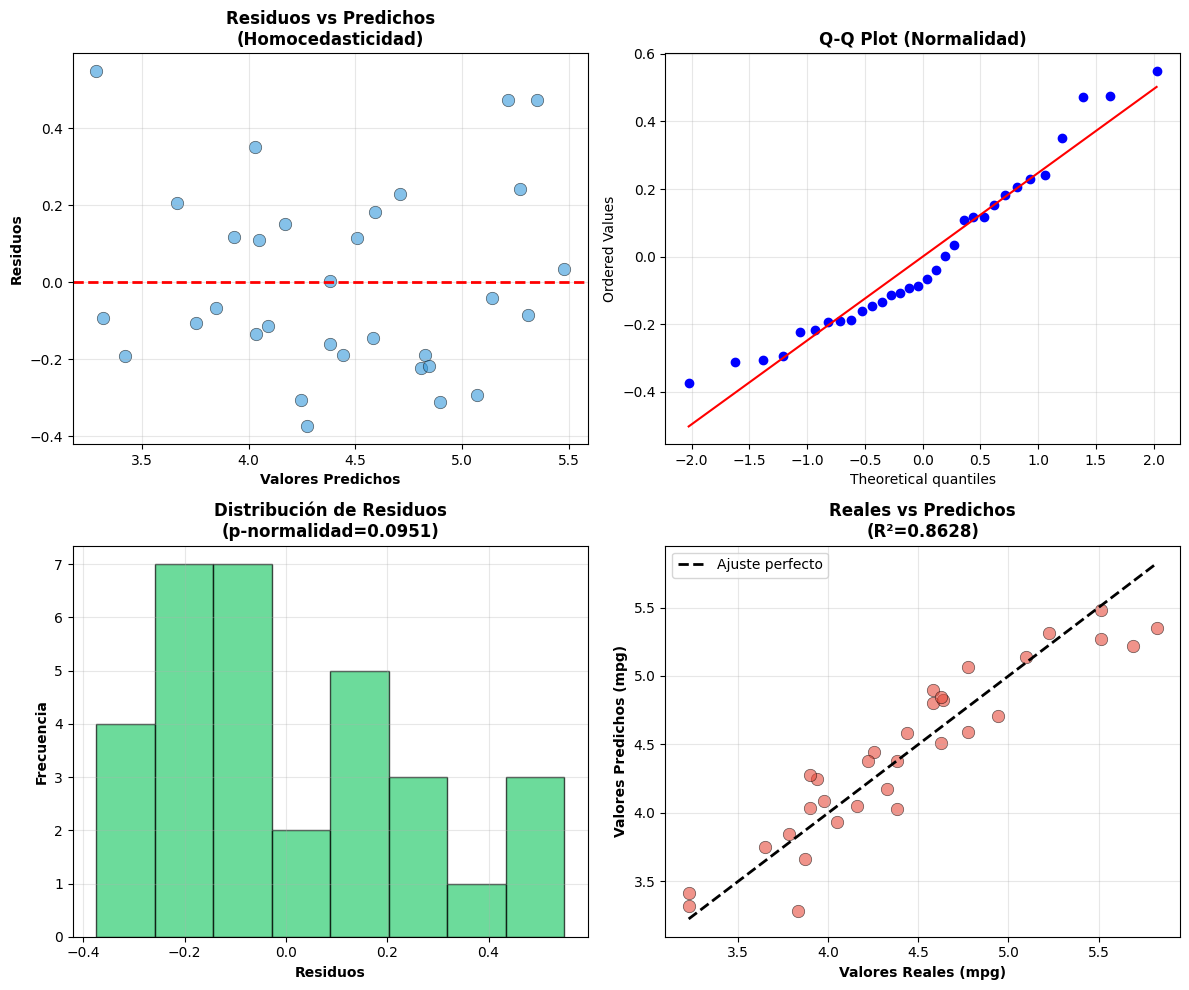

In [ ]:
# ============================================================================
# SECCIÓN 6: REGRESIÓN LINEAL MÚLTIPLE
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 6: REGRESIÓN LINEAL MÚLTIPLE")
print("="*80)

X_multiple = CAR_KDD[['hp', 'wt', 'am']]
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_multiple, y)
pred_multiple = modelo_multiple.predict(X_multiple)
residuos_multiple = y - pred_multiple

print(f"\nMÉTRICAS DEL MODELO MÚLTIPLE:")
r2_multiple = modelo_multiple.score(X_multiple, y)
rmse_multiple = np.sqrt(np.mean(residuos_multiple**2))
aic_multiple = len(y) * np.log(np.sum(residuos_multiple**2)/len(y)) + 2*4
bic_multiple = len(y) * np.log(np.sum(residuos_multiple**2)/len(y)) + np.log(len(y))*4

print(f"  Coeficientes:")
print(f"    - Intercepto:  {modelo_multiple.intercept_:.6f}")
print(f"    - hp:          {modelo_multiple.coef_[0]:.6f}")
print(f"    - wt:          {modelo_multiple.coef_[1]:.6f}")
print(f"    - am:          {modelo_multiple.coef_[2]:.6f}")
print(f"\n  Ecuación: mpg = {modelo_multiple.intercept_:.4f} + {modelo_multiple.coef_[0]:.4f}*hp + {modelo_multiple.coef_[1]:.4f}*wt + {modelo_multiple.coef_[2]:.4f}*am")
print(f"\n  R²:              {r2_multiple:.6f}")
print(f"  RMSE:            {rmse_multiple:.6f}")
print(f"  AIC:             {aic_multiple:.6f}")
print(f"  BIC:             {bic_multiple:.6f}")

# ---- VERIFICACIÓN DE SUPUESTOS PARA MODELO MÚLTIPLE ----
print(f"\nVERIFICACIÓN DE SUPUESTOS (MODELO MÚLTIPLE):")

# Supuesto 1: Normalidad
statistic_norm_mult, p_value_norm_mult = stats.shapiro(residuos_multiple)
print(f"\n  1. NORMALIDAD (Shapiro-Wilk Test):")
print(f"     p-valor:     {p_value_norm_mult:.6f}")
print(f"     Resultado:   {'✓ Residuos normales' if p_value_norm_mult > 0.05 else '✗ Residuos NO normales'}")

# Supuesto 2: Homocedasticidad
residuos_abs_std_mult = np.abs(residuos_multiple) / np.std(residuos_multiple)
aux_model_mult = LinearRegression()
aux_model_mult.fit(X_multiple.values, residuos_abs_std_mult)
pred_aux_mult = aux_model_mult.predict(X_multiple.values)
ss_res_aux_mult = np.sum((residuos_abs_std_mult - pred_aux_mult)**2)
ss_tot_aux_mult = np.sum((residuos_abs_std_mult - np.mean(residuos_abs_std_mult))**2)
lr_stat_mult = len(y) * (1 - ss_res_aux_mult/ss_tot_aux_mult)
p_value_hetero_mult = 1 - stats.chi2.cdf(lr_stat_mult, 3)

print(f"\n  2. HOMOCEDASTICIDAD (Breusch-Pagan):")
print(f"     p-valor:     {p_value_hetero_mult:.6f}")
print(f"     Resultado:   {'✓ Varianza constante' if p_value_hetero_mult > 0.05 else '✗ Varianza NO constante'}")

# Supuesto 3: Independencia
dw_mult = np.sum(np.diff(residuos_multiple)**2) / np.sum(residuos_multiple**2)
print(f"\n  3. INDEPENDENCIA (Durbin-Watson):")
print(f"     Estadístico: {dw_mult:.6f}")
print(f"     Resultado:   {'✓ Residuos independientes' if 1.5 <= dw_mult <= 2.5 else '⚠ Posible autocorrelación'}")

# Supuesto 4: Multicolinealidad (VIF)
print(f"\n  4. MULTICOLINEALIDAD (Variance Inflation Factor):")
vif_data = pd.DataFrame()
vif_data['Variable'] = ['hp', 'wt', 'am']
vif_data['VIF'] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]
print(vif_data.to_string(index=False))
print(f"     Regla: VIF < 5 es aceptable (< 10 es tolerable)")
print(f"     Resultado:   {'✓ No hay multicolinealidad severa' if all(vif_data['VIF'] < 5) else '⚠ Revisar multicolinealidad'}")

# Gráficos de diagnóstico para modelo múltiple
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Residuos vs Predichos
axes[0, 0].scatter(pred_multiple, residuos_multiple, color='#3498db', alpha=0.6, s=80, edgecolor='black', linewidth=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos', fontsize=10, fontweight='bold')
axes[0, 0].set_ylabel('Residuos', fontsize=10, fontweight='bold')
axes[0, 0].set_title('Residuos vs Predichos\n(Homocedasticidad)', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Gráfico 2: Q-Q Plot
stats.probplot(residuos_multiple, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normalidad)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Gráfico 3: Histograma de residuos
axes[1, 0].hist(residuos_multiple, bins=8, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuos', fontsize=10, fontweight='bold')
axes[1, 0].set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
axes[1, 0].set_title(f'Distribución de Residuos\n(p-normalidad={p_value_norm_mult:.4f})', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Gráfico 4: Valores reales vs predichos
axes[1, 1].scatter(y, pred_multiple, color='#e74c3c', alpha=0.6, s=80, edgecolor='black', linewidth=0.5)
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2, label='Ajuste perfecto')
axes[1, 1].set_xlabel('Valores Reales (mpg)', fontsize=10, fontweight='bold')
axes[1, 1].set_ylabel('Valores Predichos (mpg)', fontsize=10, fontweight='bold')
axes[1, 1].set_title(f'Reales vs Predichos\n(R²={r2_multiple:.4f})', fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# SECCIÓN 7: COMPARACIÓN DE MODELOS Y SELECCIÓN DEL MEJOR
# ============================================================================

print("\n" + "="*80)
print("SECCIÓN 7: COMPARACIÓN Y SELECCIÓN DEL MEJOR MODELO")
print("="*80)

# Crear tabla comparativa
print("\n1. COMPARACIÓN DE MODELOS SIMPLES:")
print("-" * 100)
comparison_simple = pd.DataFrame(supuestos_simples).T
comparison_simple = comparison_simple.round(6)
print(comparison_simple.to_string())

print("\n2. CRITERIOS PARA SELECCIONAR EL MEJOR MODELO:")
print("-" * 100)

print("\n  Modelo 1: mpg ~ hp")
print(f"    R²:           {supuestos_simples['hp']['r2']:.6f}")
print(f"    RMSE:         {supuestos_simples['hp']['rmse']:.6f}")
print(f"    AIC:          {supuestos_simples['hp']['aic']:.6f}")
print(f"    Normalidad:   {'✓' if supuestos_simples['hp']['normalidad'] else '✗'}")
print(f"    Homoce.:      {'✓' if supuestos_simples['hp']['homocedasticidad'] else '✗'}")
print(f"    Indepen.:     {'✓' if supuestos_simples['hp']['independencia'] else '✗'}")

print("\n  Modelo 2: mpg ~ wt")
print(f"    R²:           {supuestos_simples['wt']['r2']:.6f}")
print(f"    RMSE:         {supuestos_simples['wt']['rmse']:.6f}")
print(f"    AIC:          {supuestos_simples['wt']['aic']:.6f}")
print(f"    Normalidad:   {'✓' if supuestos_simples['wt']['normalidad'] else '✗'}")
print(f"    Homoce.:      {'✓' if supuestos_simples['wt']['homocedasticidad'] else '✗'}")
print(f"    Indepen.:     {'✓' if supuestos_simples['wt']['independencia'] else '✗'}")

print("\n  Modelo 3: mpg ~ am")
print(f"    R²:           {supuestos_simples['am']['r2']:.6f}")
print(f"    RMSE:         {supuestos_simples['am']['rmse']:.6f}")
print(f"    AIC:          {supuestos_simples['am']['aic']:.6f}")
print(f"    Normalidad:   {'✓' if supuestos_simples['am']['normalidad'] else '✗'}")
print(f"    Homoce.:      {'✓' if supuestos_simples['am']['homocedasticidad'] else '✗'}")
print(f"    Indepen.:     {'✓' if supuestos_simples['am']['independencia'] else '✗'}")

print("\n  Modelo 4: mpg ~ hp + wt + am (MÚLTIPLE)")
print(f"    R²:           {r2_multiple:.6f}")
print(f"    RMSE:         {rmse_multiple:.6f}")
print(f"    AIC:          {aic_multiple:.6f}")
print(f"    BIC:          {bic_multiple:.6f}")
print(f"    Normalidad:   {'✓' if p_value_norm_mult > 0.05 else '✗'}")
print(f"    Homoce.:      {'✓' if p_value_hetero_mult > 0.05 else '✗'}")
print(f"    Indepen.:     {'✓' if 1.5 <= dw_mult <= 2.5 else '✗'}")
print(f"    Multicolineal: {'✓' if all(vif_data['VIF'] < 5) else '⚠'}")

print("\n3. RECOMENDACIÓN FINAL:")
print("-" * 100)

# Determinar mejor modelo
mejores_r2 = sorted(supuestos_simples.items(), key=lambda x: x[1]['r2'], reverse=True)
mejor_simple_r2 = mejores_r2[0]

print(f"\n  → Mejor modelo simple por R²: mpg ~ {mejor_simple_r2[0]} (R² = {mejor_simple_r2[1]['r2']:.6f})")

if r2_multiple > mejor_simple_r2[1]['r2']:
    print(f"  → MODELO RECOMENDADO: REGRESIÓN MÚLTIPLE")
    print(f"     Razón: Mayor poder explicativo (R² = {r2_multiple:.6f})")
    print(f"     Ecuación: mpg = {modelo_multiple.intercept_:.4f} + {modelo_multiple.coef_[0]:.4f}*hp + {modelo_multiple.coef_[1]:.4f}*wt + {modelo_multiple.coef_[2]:.4f}*am")
else:
    print(f"  → MODELO RECOMENDADO: mpg ~ {mejor_simple_r2[0]}")
    print(f"     Razón: Suficiente poder explicativo con mayor simplicidad")
    print(f"     Ecuación: mpg = {modelo_multiple.intercept_:.4f} + {modelo_multiple.coef_[0]:.4f}*{mejor_simple_r2[0]}")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)



SECCIÓN 7: COMPARACIÓN Y SELECCIÓN DEL MEJOR MODELO

1. COMPARACIÓN DE MODELOS SIMPLES:
----------------------------------------------------------------------------------------------------
          r2      rmse        aic normalidad homocedasticidad independencia
hp  0.619855   0.40121 -54.449324       True             True         False
wt  0.780488  0.304878 -72.022004       True             True         False
am   0.35183  0.523892 -37.374072       True             True         False

2. CRITERIOS PARA SELECCIONAR EL MEJOR MODELO:
----------------------------------------------------------------------------------------------------

  Modelo 1: mpg ~ hp
    R²:           0.619855
    RMSE:         0.401210
    AIC:          -54.449324
    Normalidad:   ✓
    Homoce.:      ✓
    Indepen.:     ✗

  Modelo 2: mpg ~ wt
    R²:           0.780488
    RMSE:         0.304878
    AIC:          -72.022004
    Normalidad:   ✓
    Homoce.:      ✓
    Indepen.:     ✗

  Modelo 3: mpg ~ am
    R